https://www.kaggle.com/nareshbhat/health-care-data-set-on-heart-attack-possibility

https://archive.ics.uci.edu/ml/datasets/heart+disease

Heart or Cardiovascular disease  is an umbrella term which refers to conditions that involve narrowed or blocked blood vessels that can lead to a heart attack, chest pain or stroke. Other heart conditions, such as those that affect your heart’s muscle, valves or rhythm, also are considered forms of heart disease.

### Build a machine learning model that can classify  if a patient is at risk of heat disease or not.

1.	age: age in years
2.	sex: sex (1 = male; 0 = female)
3.	cp: chest pain type
-- Value 0: typical angina
-- Value 1: atypical angina
-- Value 2: non-anginal pain
-- Value 3: asymptomatic
4.	trestbps: resting blood pressure (in mm Hg on admission to the hospital)
5.	chol: serum cholesterol in mg/dl
6.	fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
7.	restecg: resting electrocardiographic results
-- Value 0: normal
-- Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
-- Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
8.	thalach

: maximum heart rate achieved
9.	exang: exercise induced angina (1 = yes; 0 = no)
10.	oldpeak = ST depression induced by exercise relative to rest
11.	slope: the slope of the peak exercise ST segment
-- Value 0: upsloping
-- Value 1: flat
-- Value 2: downsloping
12.	ca: number of major vessels (0-3) colored by flourosopy
13.	thal: 0 = normal; 1 = fixed defect; 2 = reversable defect
and the label
14.	condition: 0 = no disease, 1 = disease


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

plt.style.use('fivethirtyeight')

from ipywidgets import *
from IPython.display import display



from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from sklearn import metrics


from sklearn.metrics import roc_curve, auc
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV

from sklearn.preprocessing import StandardScaler

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

## EDA

In [2]:
# import csv
df = pd.read_csv('heart.csv')

In [3]:
# view shape
df.shape


(303, 14)

In [4]:
# Check for missing values
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [5]:
# view data types 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


df.columns

In [6]:
# check if data set is balanced.
df.target.value_counts(normalize = True)

1    0.544554
0    0.455446
Name: target, dtype: float64

(array([0, 1]), [Text(0, 0, 'No Disease'), Text(1, 0, 'Disease')])

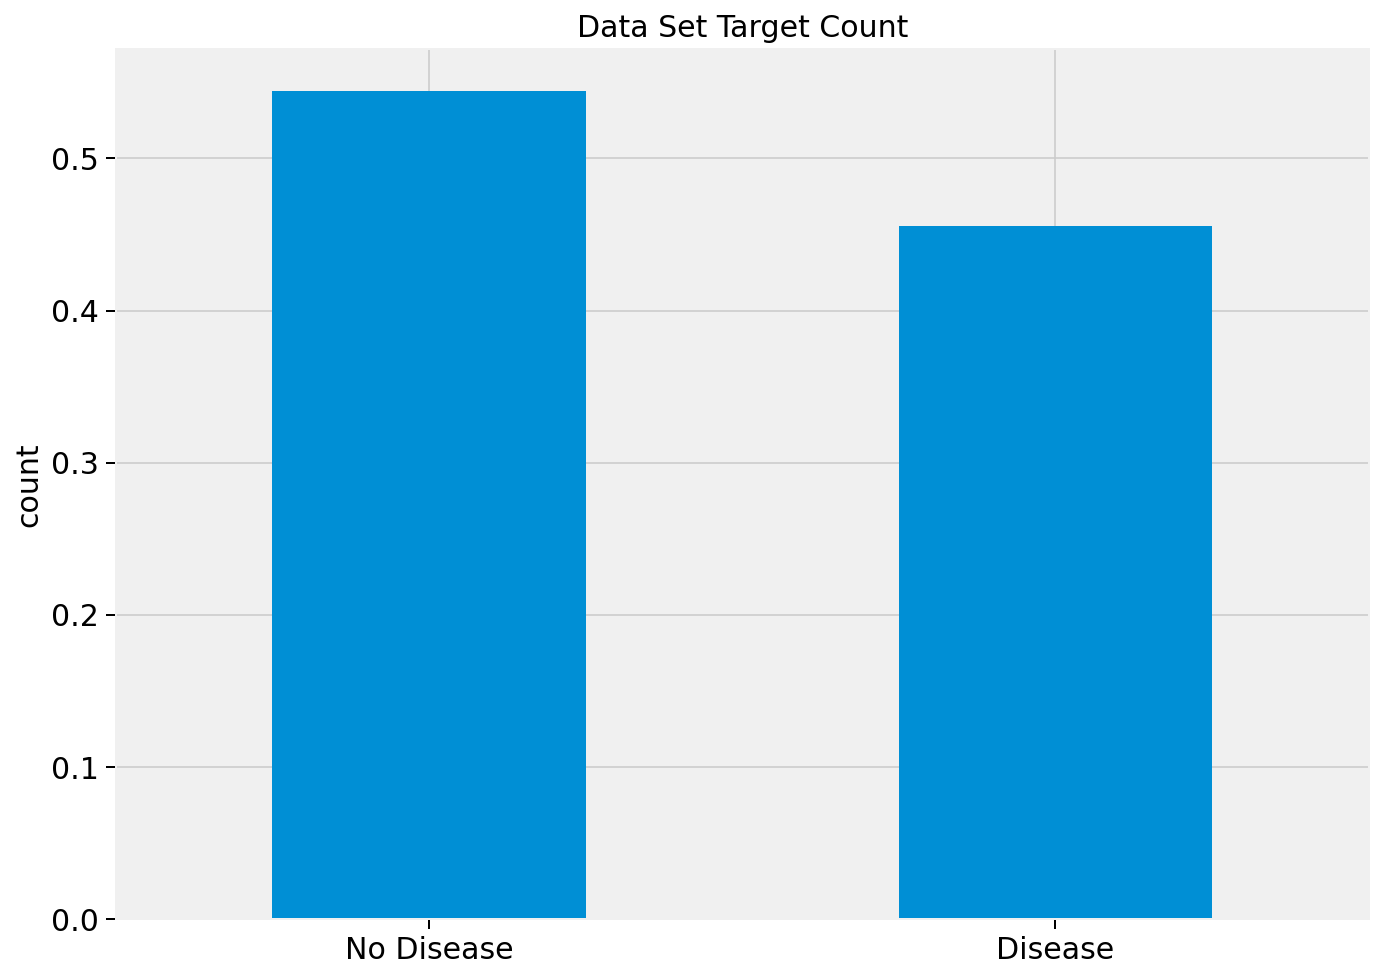

In [7]:
# plot of Target count
plt.figure(figsize = (10,8))
sns.set_context('paper')
df.target.value_counts(normalize = True).plot(kind = 'bar')
plt.title('Data Set Target Count', size = 15)
plt.xticks(ticks = [0,1], labels = ['No Disease', 'Disease'], fontsize = 15)
plt.yticks( fontsize = 15)
plt.ylabel('count', fontsize = 15)
plt.xlabel('', fontsize = 15)
plt.xticks(rotation=0)
#plt.savefig('Data_Set_Target_Count.png')

In [8]:
#view column names
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [9]:
# view head
df.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [10]:
#view tails
df.tail(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
293,67,1,2,152,212,0,0,150,0,0.8,1,0,3,0
294,44,1,0,120,169,0,1,144,1,2.8,0,0,1,0
295,63,1,0,140,187,0,0,144,1,4.0,2,2,3,0
296,63,0,0,124,197,0,1,136,1,0.0,1,0,2,0
297,59,1,0,164,176,1,0,90,0,1.0,1,2,1,0
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [11]:
# summary statistics
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [12]:
# subset dataset for positive cases
df1 = df[df.target == 1]
df1.sex.value_counts(normalize = False)

1    93
0    72
Name: sex, dtype: int64

In [13]:
# subset dataset for negative case
df2 = df[df.target == 0]
df2.sex.value_counts(normalize = False)

1    114
0     24
Name: sex, dtype: int64

In [14]:
# view gender count
df.sex.value_counts(normalize = False)

1    207
0     96
Name: sex, dtype: int64

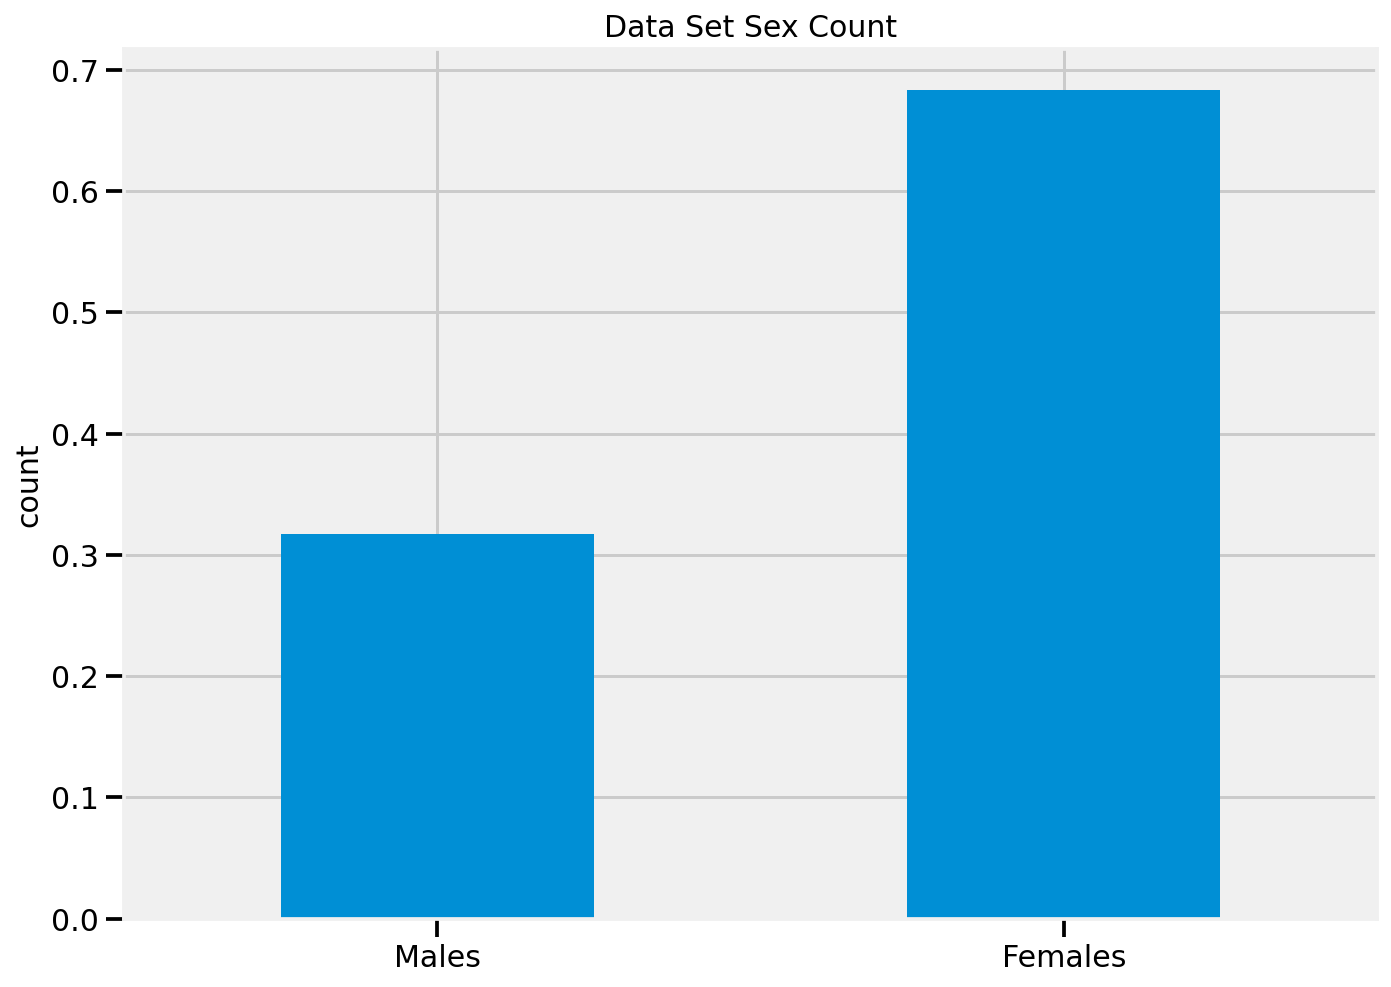

In [15]:
# plot gender count
plt.figure(figsize = (10,8))
sns.set_context('talk')
df.sex.value_counts(normalize =True, sort = False).plot(kind = 'bar')
plt.title('Data Set Sex Count', size = 15)
plt.xticks(ticks = [0,1], labels = ['Males', 'Females'], fontsize = 15)
plt.yticks( fontsize = 15)
plt.ylabel('count', fontsize = 15)
plt.xlabel('', fontsize = 15)
plt.xticks(rotation= 0)
plt.show()
#plt.savefig('Data_Set_Sex_Count.png')



Text(0, 0.5, 'count')

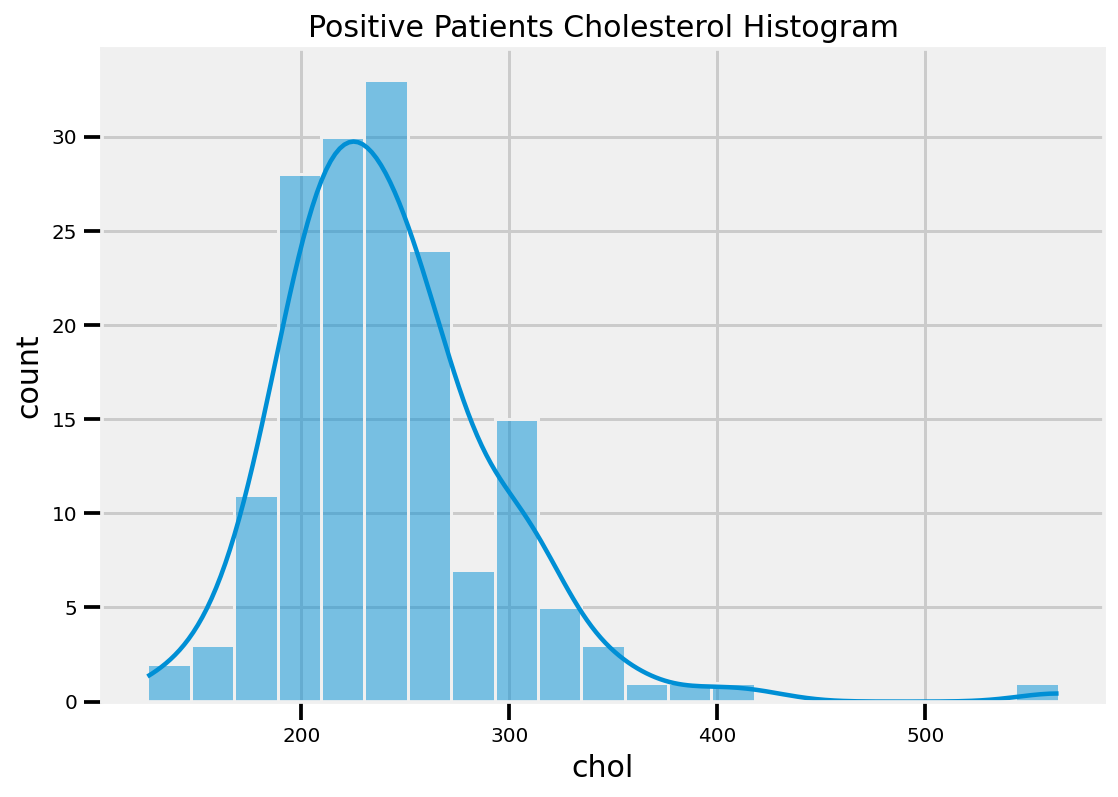

In [16]:
# plot cholesterol distribution among positive cases
plt.figure(figsize = (8,6))
sns.set_context('talk')
sns.histplot(df1.chol, kde = True)
plt.title('Positive Patients Cholesterol Histogram', size =15)
plt.xlabel('chol', fontsize = 15)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.ylabel('count', fontsize = 15)
#plt.savefig('Positive Patients Cholesterol Histogram.png')

Text(0, 0.5, 'count')

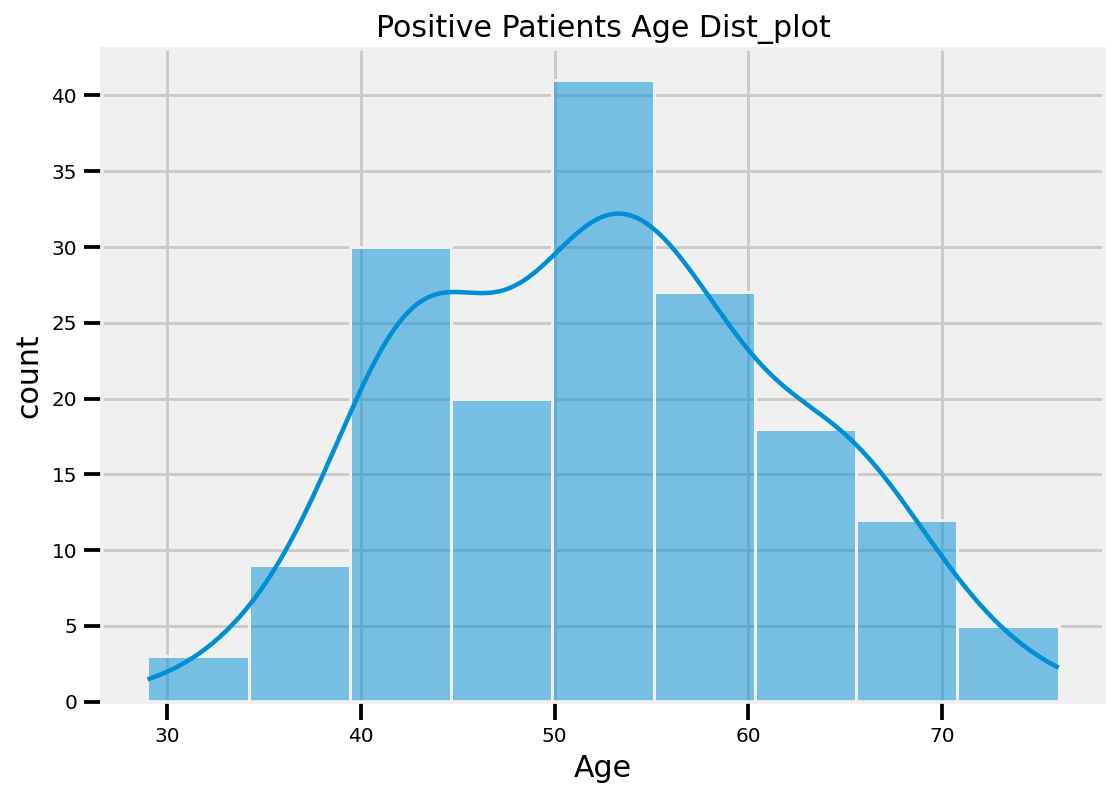

In [17]:
# age distribution among positive cases
plt.figure(figsize = (8,6))
sns.set_context('talk')
sns.histplot(df1.age, kde = True)
plt.title('Positive Patients Age Dist_plot', size =15)
plt.xlabel('Age', fontsize = 15)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.ylabel('count', fontsize = 15)
#plt.savefig('Positive Patients Age Dist_plot'.png')

Text(0, 0.5, 'count')

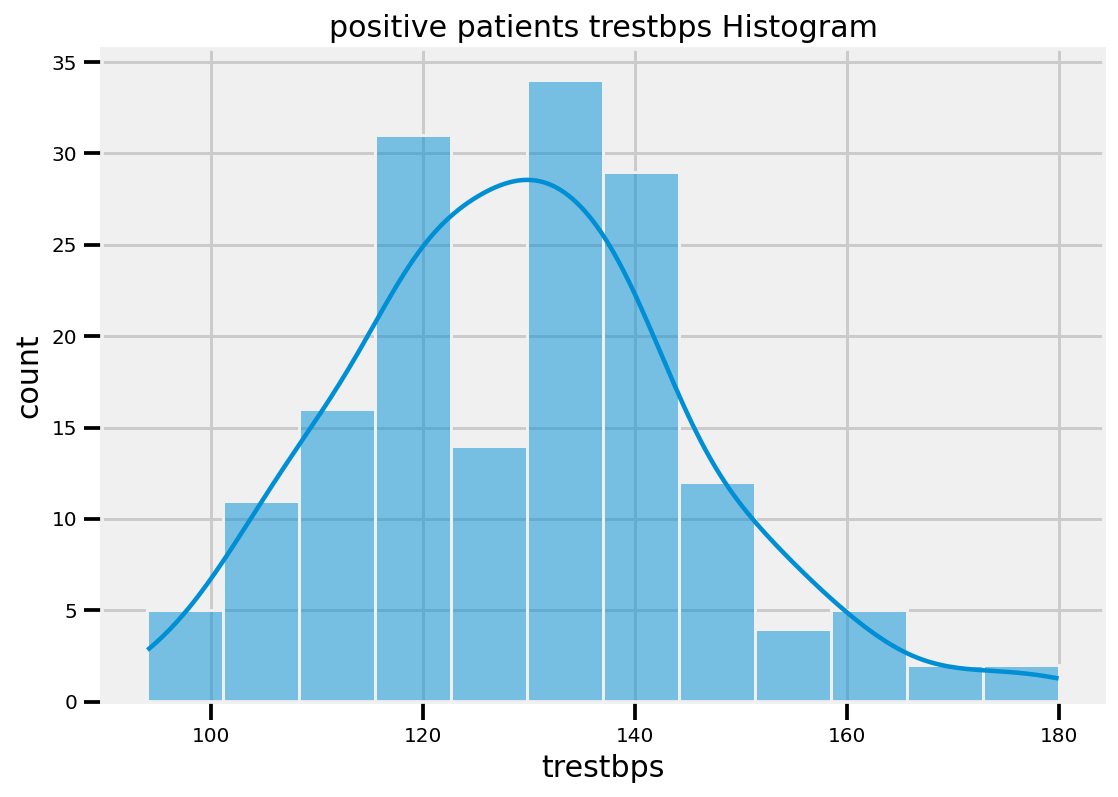

In [18]:
# at rest bp among positve cases
plt.figure(figsize = (8,6))
sns.set_context('talk')
sns.histplot(df1.trestbps, kde = True)
plt.title('positive patients trestbps Histogram', size =15)
plt.xlabel('trestbps', fontsize = 15)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.ylabel('count', fontsize = 15)
#plt.savefig('positive patients trestbps Histogram.png')

In [19]:
#chest pain value counts
df.cp.value_counts()

0    143
2     87
1     50
3     23
Name: cp, dtype: int64

<Figure size 720x576 with 0 Axes>

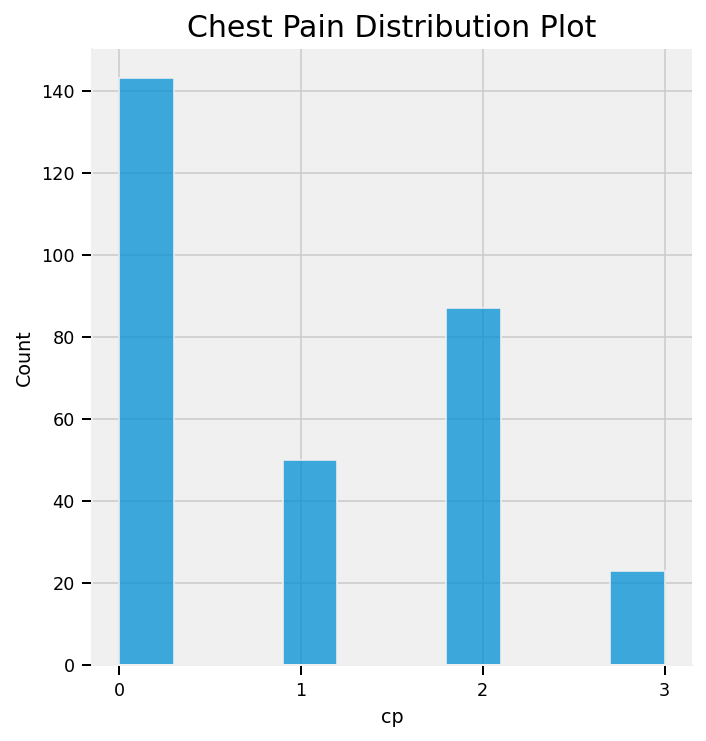

In [20]:
# plot cp value counts
plt.figure(figsize = (10,8))
sns.set_context('paper')
sns.displot(df.cp)
plt.title('Chest Pain Distribution Plot', size = 15)
plt.xticks(ticks = [0, 1, 2, 3])
plt.show()

Text(0, 0.5, 'chol_ mg/dl')

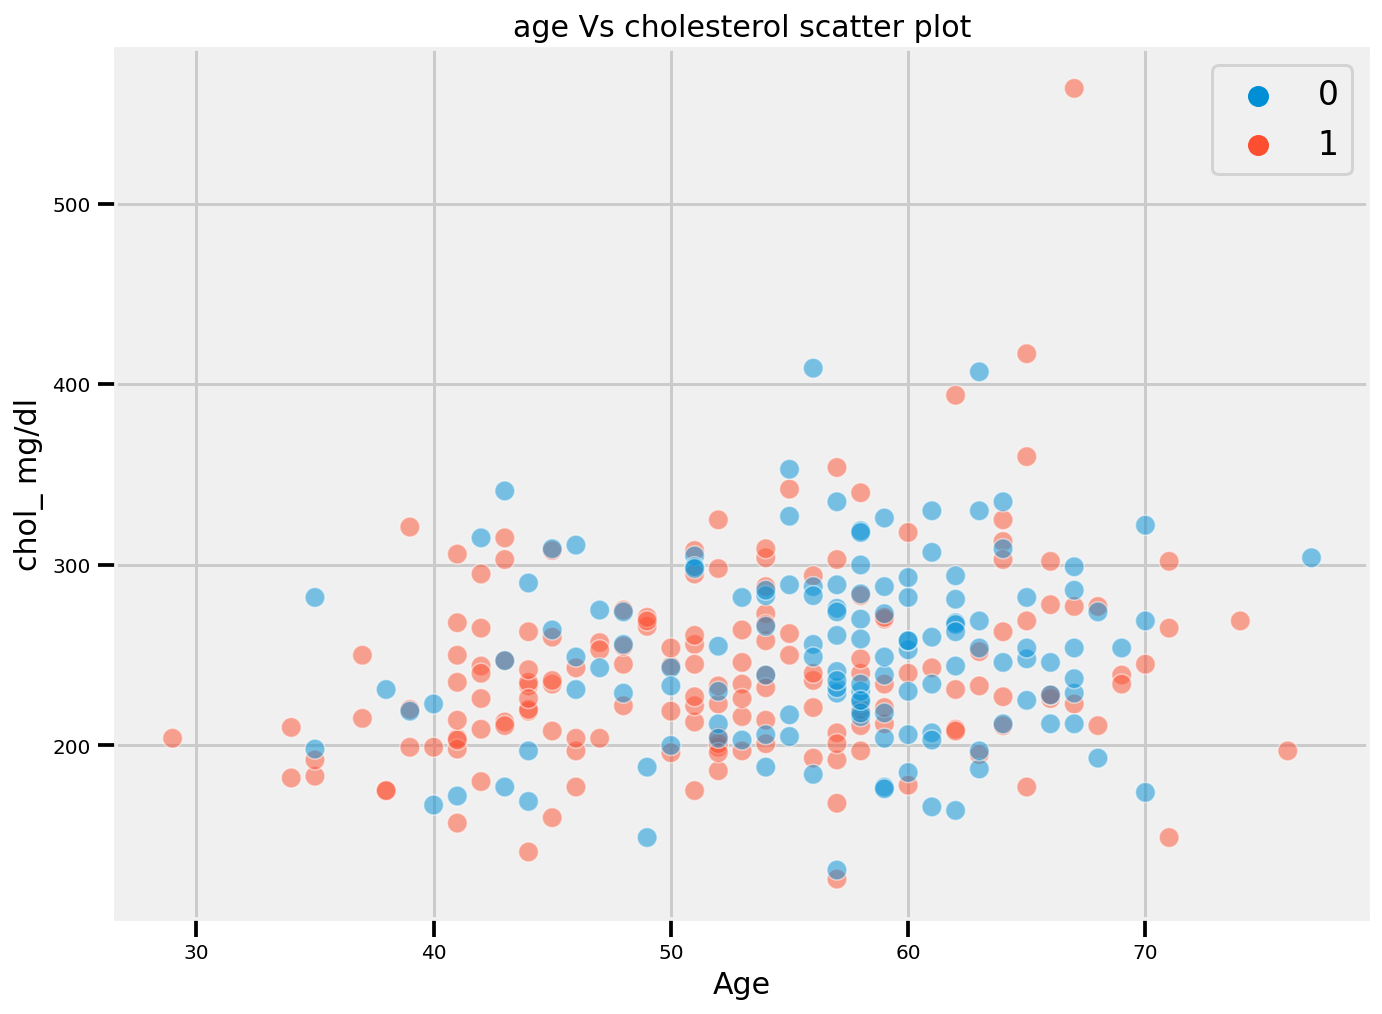

In [21]:
# scatter plot age Vs cholesterol showing positive and negative cases
plt.figure(figsize = (10,8))
sns.set_context('talk')
sns.scatterplot(y = df.chol, x = df.age, data = df, hue = df.target, s = 100, alpha = 0.5)
plt.legend(loc = 0)
plt.title('age Vs cholesterol scatter plot', size = 15)
plt.xlabel('Age', fontsize = 15)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.ylabel('chol_ mg/dl', fontsize = 15)
#plt.savefig('age_cholesterol_scatter_plot.png')

Text(0, 0.5, 'trestbps_ mm HG')

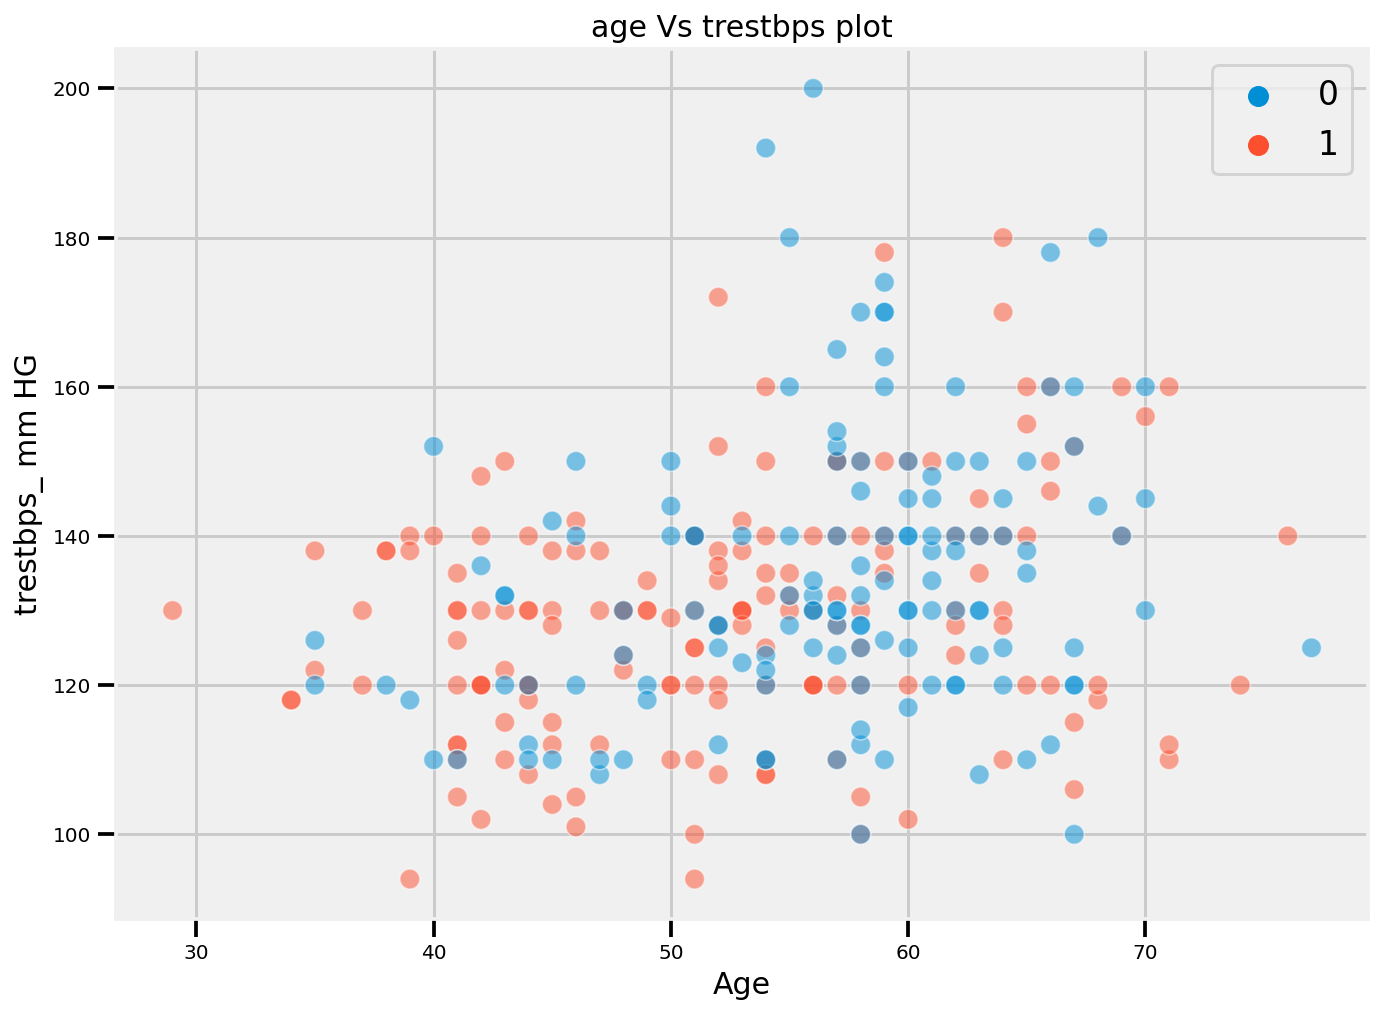

In [22]:
# plot age vs at rest bp. showing positive and negative cases
plt.figure(figsize = (10,8))
sns.set_context('talk')
sns.scatterplot(y = df.trestbps, x = df.age, data = df, hue = df.target, s = 100, alpha = 0.5)
plt.legend(loc = 0)
plt.title('age Vs trestbps plot', size = 15)
plt.xlabel('Age', fontsize = 15)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.ylabel('trestbps_ mm HG', fontsize = 15)

#plt.savefig('age_trestbps_plot.png')

Text(0.5, 1.0, 'Sex_Target_Results Normalised Bar chart')

<Figure size 720x576 with 0 Axes>

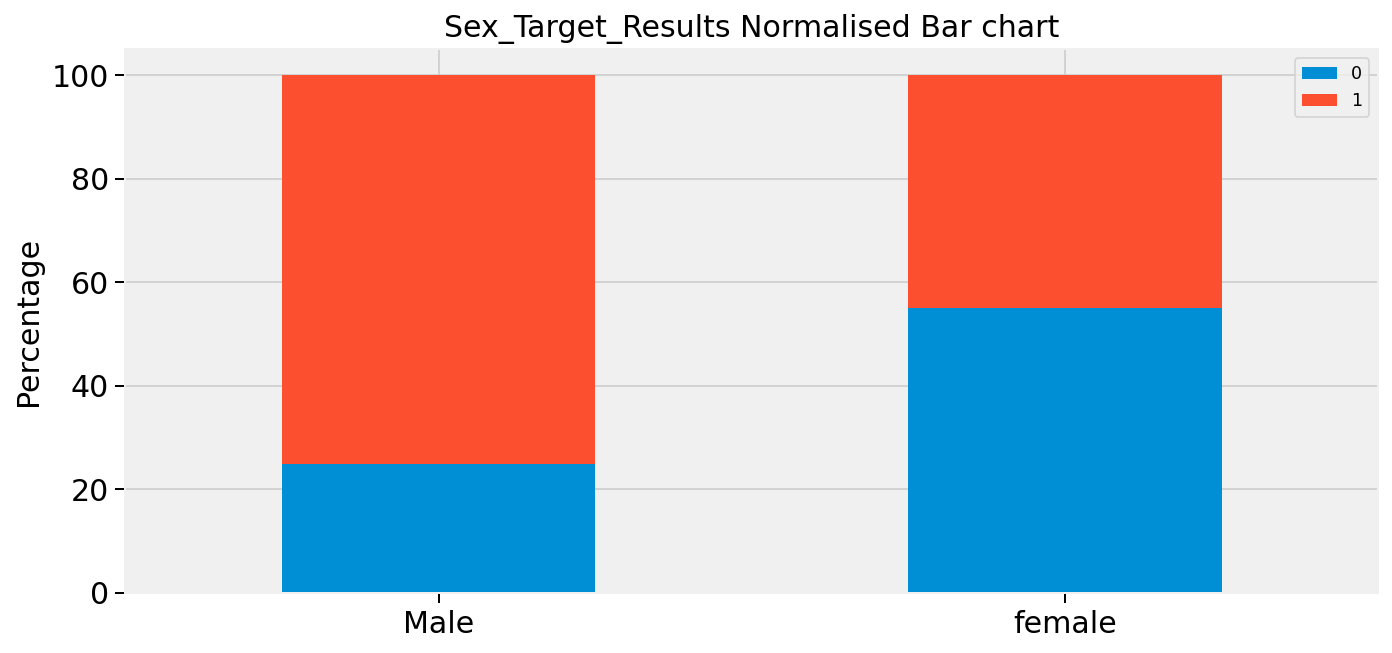

In [23]:
# view wsplit of positve and negative cases grouped by gender

def bar_chart(train, feature):
    female = train[train['sex']==1][feature].value_counts(normalize=True)*100
    male = train[train['sex']==0][feature].value_counts(normalize=True)*100
    df = pd.DataFrame([male,female])
    df.index = ['Male','female']
    df.plot(kind='bar',stacked=True, figsize=(10,5))
    
# 
plt.figure(figsize = (10,8))
sns.set_context('paper')
bar_chart(df, 'target')
plt.xticks(fontsize = 15 )
plt.xticks(rotation=0)
plt.yticks(fontsize = 15)
plt.ylabel('Percentage', fontsize = 15)
plt.title("Sex_Target_Results Normalised Bar chart", fontsize = 15)
#plt.savefig('Sex_Target_Results_Normalised_Bar_chart.png')



In [24]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [25]:
# drop non neumeric values

df_neumeric = df.copy()

df_neumeric.drop(columns = [ 'sex', 'cp', 'fbs', 'restecg',
       'exang', 'slope', 'thal'], inplace = True)
df_neumeric

,age,trestbps,chol,thalach,oldpeak,ca,target
0,63,145,233,150,2.3,0,1
1,37,130,250,187,3.5,0,1
2,41,130,204,172,1.4,0,1
3,56,120,236,178,0.8,0,1
4,57,120,354,163,0.6,0,1
...,...,...,...,...,...,...,...
298,57,140,241,123,0.2,0,0
299,45,110,264,132,1.2,0,0
300,68,144,193,141,3.4,2,0
301,57,130,131,115,1.2,1,0


Text(0.5, 1.0, 'Corr of Neumeric Variables')

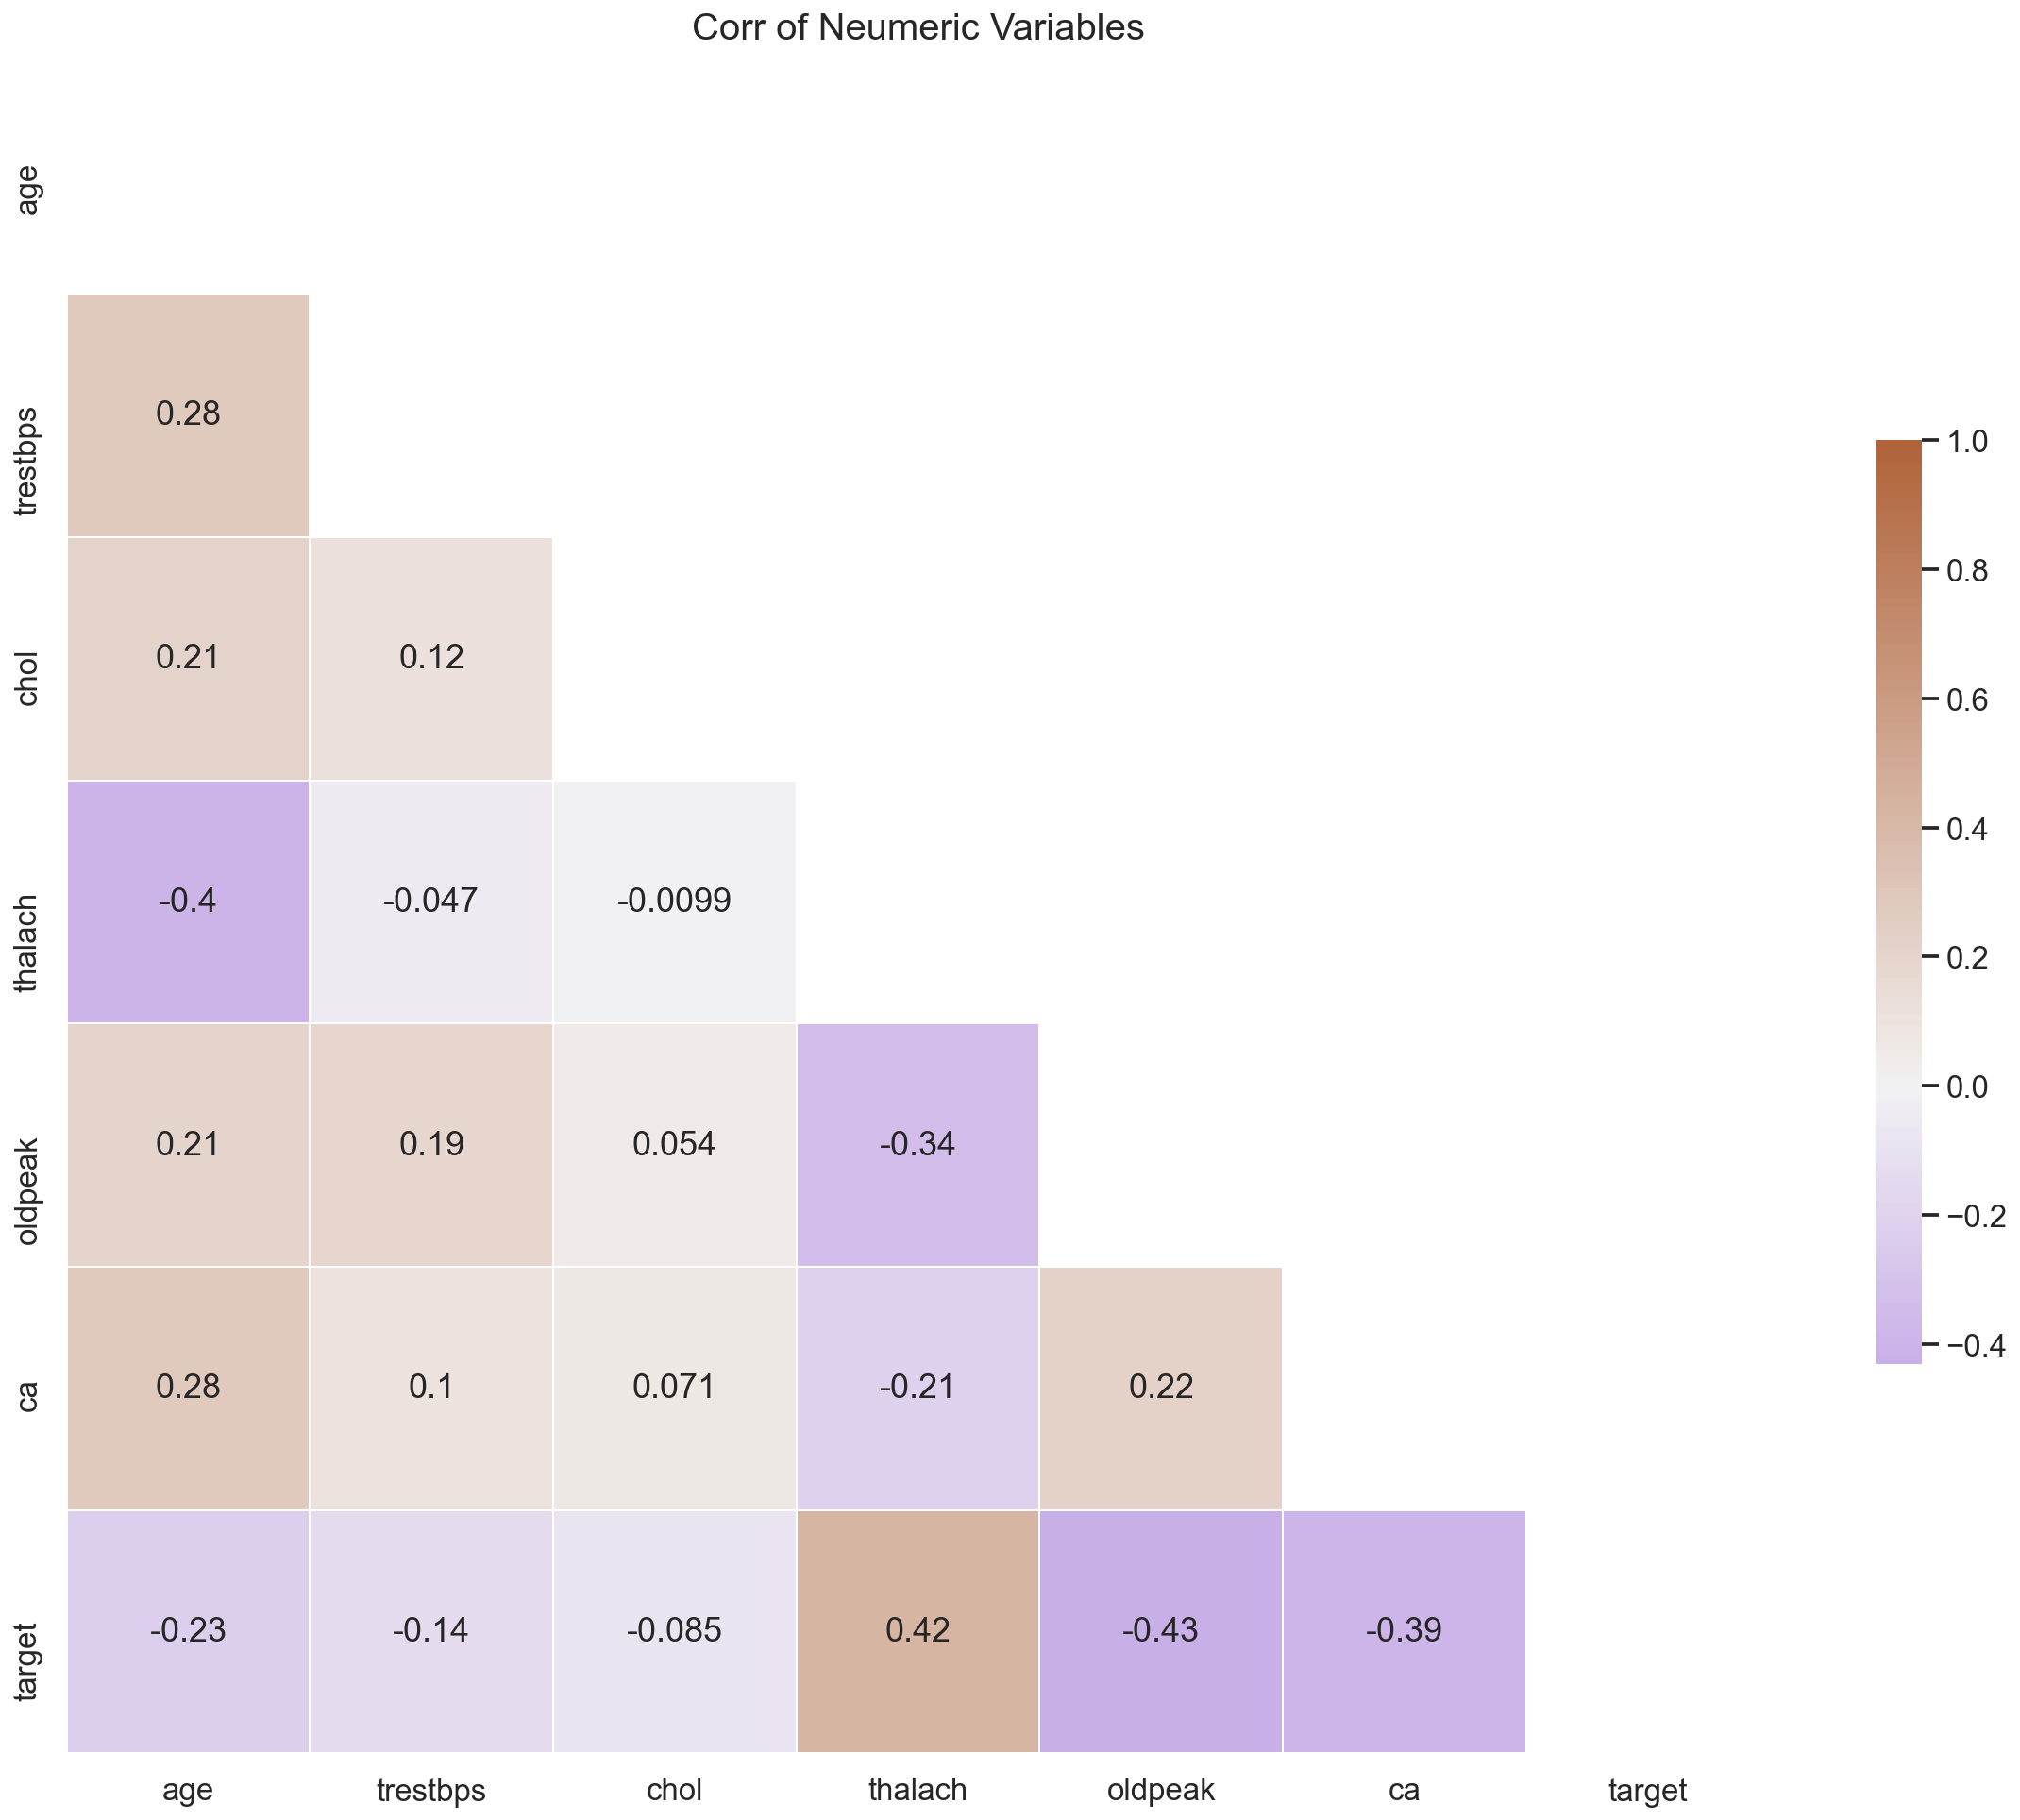

In [26]:
# correlation of numeric values
# Copied code from seaborn examples
# https://seaborn.pydata.org/examples/many_pairwise_correlations.html
sns.set(style="white")
sns.set_context('talk')
# Generate a mask for the upper triangle
mask = np.zeros_like(df_neumeric.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(18, 18))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(280, 30, as_cmap=True)


# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(df_neumeric.corr(), mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)
plt.title('Corr of Neumeric Variables', fontsize = 20)

#plt.savefig('corr_heatmap.png')

In [27]:
# define X and Y columns
predictors = [c for c in df.columns if c != 'target']
X = df[predictors]
y = df.target

In [28]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [29]:
# one hot encode data
X_encoded = pd.get_dummies(X, columns=[ 'sex', 'cp', 'fbs', 'restecg',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'])
X_encoded

,age,trestbps,chol,thalach,sex_0,sex_1,cp_0,cp_1,cp_2,cp_3,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,63,145,233,150,0,1,0,0,0,1,...,0,1,0,0,0,0,0,1,0,0
1,37,130,250,187,0,1,0,0,1,0,...,0,1,0,0,0,0,0,0,1,0
2,41,130,204,172,1,0,0,1,0,0,...,1,1,0,0,0,0,0,0,1,0
3,56,120,236,178,0,1,0,1,0,0,...,1,1,0,0,0,0,0,0,1,0
4,57,120,354,163,1,0,1,0,0,0,...,1,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,140,241,123,1,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,1
299,45,110,264,132,0,1,0,0,0,1,...,0,1,0,0,0,0,0,0,0,1
300,68,144,193,141,0,1,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
301,57,130,131,115,0,1,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1


## Logistc regression one hot encoded

In [30]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X_encoded,y, test_size = 0.2, random_state = 45)

In [31]:
#standard scale X_train amd x_test and 

scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

# create Model and fit scaled predictors

logreg = LogisticRegression()
logreg.fit(scaled_X_train, y_train)

y_pred = logreg.predict(scaled_X_test)
y_pred

array([1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0], dtype=int64)

In [32]:
# print classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.70      0.83      0.76        23
           1       0.88      0.79      0.83        38

    accuracy                           0.80        61
   macro avg       0.79      0.81      0.80        61
weighted avg       0.81      0.80      0.81        61



In [33]:
# print matrix

print(metrics.confusion_matrix(y_test, y_pred))

[[19  4]
 [ 8 30]]


## Logistic Regresion not encoded

In [34]:
# define X and Y
predictors = [c for c in df.columns if c != 'target']
X = df[predictors]
y = df.target

In [35]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [36]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 45)

scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

# create Model and fit scaled predictors

logreg2 = LogisticRegression()
logreg2.fit(scaled_X_train, y_train)

y_pred = logreg2.predict(scaled_X_test)
y_pred

array([1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0], dtype=int64)

In [37]:
# print reports
print(classification_report(y_test, y_pred))

print(metrics.confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.91      0.82        23
           1       0.94      0.82      0.87        38

    accuracy                           0.85        61
   macro avg       0.84      0.86      0.85        61
weighted avg       0.87      0.85      0.85        61

[[21  2]
 [ 7 31]]


## SVM 

In [38]:
# define x and Y
predictors = [c for c in df.columns if c != 'target']
X = df[predictors]
y = df.target

In [39]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 45)

#standard scale X_train amd x_test and 

scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

#Create a svm Classifier
clf = svm.SVC(kernel ='linear', C= 1 , random_state = 45, probability = True,  ) # rbf Kernel

#Train the model using the training sets
clf.fit(scaled_X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(scaled_X_test)
y_pred

array([1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0], dtype=int64)

In [40]:
#print report and matrix 
print(classification_report(y_test, y_pred))

print(metrics.confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.87      0.85        23
           1       0.92      0.89      0.91        38

    accuracy                           0.89        61
   macro avg       0.88      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61

[[20  3]
 [ 4 34]]


## SVM one hot encoded

In [41]:
#define X and Y
predictors = [c for c in df.columns if c != 'target']
X = df[predictors]
y = df.target

In [42]:
# one hot encod
X_encoded = pd.get_dummies(X, columns=[ 'sex', 'cp', 'fbs', 'restecg',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'])
X_encoded

,age,trestbps,chol,thalach,sex_0,sex_1,cp_0,cp_1,cp_2,cp_3,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,63,145,233,150,0,1,0,0,0,1,...,0,1,0,0,0,0,0,1,0,0
1,37,130,250,187,0,1,0,0,1,0,...,0,1,0,0,0,0,0,0,1,0
2,41,130,204,172,1,0,0,1,0,0,...,1,1,0,0,0,0,0,0,1,0
3,56,120,236,178,0,1,0,1,0,0,...,1,1,0,0,0,0,0,0,1,0
4,57,120,354,163,1,0,1,0,0,0,...,1,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,140,241,123,1,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,1
299,45,110,264,132,0,1,0,0,0,1,...,0,1,0,0,0,0,0,0,0,1
300,68,144,193,141,0,1,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
301,57,130,131,115,0,1,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1


In [43]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X_encoded,y, test_size = 0.2, random_state = 45)

#standard scale X_train amd x_test and 

scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

#Create a svm Classifier
clf = svm.SVC(kernel ='linear', C= 1 , random_state = 45, probability = True,  ) # rbf Kernel

#Train the model using the training sets
clf.fit(scaled_X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(scaled_X_test)
y_pred


array([1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0], dtype=int64)

In [44]:
#print report and matrix
print(classification_report(y_test, y_pred))

print(metrics.confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.71      0.87      0.78        23
           1       0.91      0.79      0.85        38

    accuracy                           0.82        61
   macro avg       0.81      0.83      0.81        61
weighted avg       0.84      0.82      0.82        61

[[20  3]
 [ 8 30]]


## Naive Bayes

In [45]:
predictors = [c for c in df.columns if c != 'target']
X = df[predictors]
y = df.target

In [46]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 45)

#standard scale X_train amd x_test and 

scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

#Create a Gaussian Classifier
nb = GaussianNB()

# Train the model using the training sets 
nb.fit(scaled_X_train, y_train)
# model.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = nb.predict(scaled_X_test)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0], dtype=int64)

In [47]:
# print rport and matrics
print(classification_report(y_test, y_pred))

print(metrics.confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.71      0.87      0.78        23
           1       0.91      0.79      0.85        38

    accuracy                           0.82        61
   macro avg       0.81      0.83      0.81        61
weighted avg       0.84      0.82      0.82        61

[[20  3]
 [ 8 30]]


# HYPER PARAMETER TUNING

## LOGISTIC REGRESSION TUNING

In [48]:
# define X and y then standerd scale.
predictors = [c for c in df.columns if c != 'target']
X = df[predictors]
y = df.target

# train test split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 45)

scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)


In [49]:
# Grid seardh - hyper tune model

lr_params = {
    'penalty': ['l1','l2'],
    'C': [1, 10, 100, 150],
    'solver':['lbfgs', 'liblinear']
}



lr_gs = GridSearchCV(LogisticRegression(random_state = 45, max_iter = 250), lr_params, cv = 5, verbose = 1, return_train_score = True)
lr_gs.fit(scaled_X_train,y_train)


Fitting 5 folds for each of 16 candidates, totalling 80 fits


C:\Users\dmuwa\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\dmuwa\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\dmuwa\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\dmuwa\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\dmuwa\anaconda3\lib\site-packages\sklearn\model_selection\_v

C:\Users\dmuwa\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\dmuwa\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\dmuwa\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\dmuwa\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\dmuwa\anaconda3\lib\site-packages\sklearn\model_selection\_v

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=250, random_state=45),
             param_grid={'C': [1, 10, 100, 150], 'penalty': ['l1', 'l2'],
                         'solver': ['lbfgs', 'liblinear']},
             return_train_score=True, verbose=1)

In [50]:
# print best parameters
print(lr_gs.best_params_)
print(lr_gs.best_score_)

{'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}
0.8267006802721089


In [51]:
#predict classification
y_pred = lr_gs.predict(scaled_X_test)
y_pred

array([1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0], dtype=int64)

In [52]:
# print report and matrix
print(classification_report(y_test, y_pred))

print(metrics.confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.91      0.82        23
           1       0.94      0.82      0.87        38

    accuracy                           0.85        61
   macro avg       0.84      0.86      0.85        61
weighted avg       0.87      0.85      0.85        61

[[21  2]
 [ 7 31]]


## SVM TUNNING

In [53]:
# define X and Y and standard scale
predictors = [c for c in df.columns if c != 'target']
X = df[predictors]
y = df.target

# train test split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 45)

scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [54]:
# Grid search - hyper tune model
svc_params = {
    'C': [1, 10,25,50,75, 100],
    'gamma': [ 0.1, 0.01, 0.001, 0.0001],
    'kernel': ['linear','rbf']
}

svc_gs = GridSearchCV(svm.SVC(probability = True, max_iter = 1000, random_state = 45), svc_params, cv = 5, verbose = 2)
#svc_gs.fit(scaled_X_train,y_train)
svc_gs.fit(X_train,y_train)


Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] END ......................C=1, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END ......................C=1, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END ......................C=1, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END ......................C=1, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END ......................C=1, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END .........................C=1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .........................C=1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .........................C=1, gamma=0.1, kernel=rbf; total time=   0.0s

C:\Users\dmuwa\anaconda3\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
C:\Users\dmuwa\anaconda3\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
C:\Users\dmuwa\anaconda3\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
C:\Users\dmuwa\anaconda3\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solv


[CV] END .........................C=1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .........................C=1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .....................C=1, gamma=0.01, kernel=linear; total time=   0.0s
[CV] END .....................C=1, gamma=0.01, kernel=linear; total time=   0.0s
[CV] END .....................C=1, gamma=0.01, kernel=linear; total time=   0.0s
[CV] END .....................C=1, gamma=0.01, kernel=linear; total time=   0.0s
[CV] END .....................C=1, gamma=0.01, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=0.01, kernel=rbf; total time=   0.0s


C:\Users\dmuwa\anaconda3\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
C:\Users\dmuwa\anaconda3\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
C:\Users\dmuwa\anaconda3\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
C:\Users\dmuwa\anaconda3\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solv

[CV] END ........................C=1, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ........................C=1, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ........................C=1, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ........................C=1, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ....................C=1, gamma=0.001, kernel=linear; total time=   0.0s
[CV] END ....................C=1, gamma=0.001, kernel=linear; total time=   0.0s
[CV] END ....................C=1, gamma=0.001, kernel=linear; total time=   0.0s
[CV] END ....................C=1, gamma=0.001, kernel=linear; total time=   0.0s
[CV] END ....................C=1, gamma=0.001, kernel=linear; total time=   0.0s
[CV] END .......................C=1, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END .......................C=1, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END .......................C=1, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END ...................

C:\Users\dmuwa\anaconda3\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
C:\Users\dmuwa\anaconda3\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
C:\Users\dmuwa\anaconda3\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
C:\Users\dmuwa\anaconda3\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solv


[CV] END .......................C=1, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END ...................C=1, gamma=0.0001, kernel=linear; total time=   0.0s
[CV] END ...................C=1, gamma=0.0001, kernel=linear; total time=   0.0s
[CV] END ...................C=1, gamma=0.0001, kernel=linear; total time=   0.0s
[CV] END ...................C=1, gamma=0.0001, kernel=linear; total time=   0.0s
[CV] END ...................C=1, gamma=0.0001, kernel=linear; total time=   0.0s
[CV] END ......................C=1, gamma=0.0001, kernel=rbf; total time=   0.0s
[CV] END ......................C=1, gamma=0.0001, kernel=rbf; total time=   0.0s
[CV] END ......................C=1, gamma=0.0001, kernel=rbf; total time=   0.0s


C:\Users\dmuwa\anaconda3\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
C:\Users\dmuwa\anaconda3\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
C:\Users\dmuwa\anaconda3\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
C:\Users\dmuwa\anaconda3\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solv

[CV] END ......................C=1, gamma=0.0001, kernel=rbf; total time=   0.0s
[CV] END ......................C=1, gamma=0.0001, kernel=rbf; total time=   0.0s
[CV] END .....................C=10, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END .....................C=10, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END .....................C=10, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END .....................C=10, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END .....................C=10, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END ........................C=10, gamma=0.1, kernel=rbf; total time=   0.0s


C:\Users\dmuwa\anaconda3\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
C:\Users\dmuwa\anaconda3\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
C:\Users\dmuwa\anaconda3\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
C:\Users\dmuwa\anaconda3\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solv

[CV] END ........................C=10, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ........................C=10, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ........................C=10, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ........................C=10, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ....................C=10, gamma=0.01, kernel=linear; total time=   0.0s
[CV] END ....................C=10, gamma=0.01, kernel=linear; total time=   0.0s
[CV] END ....................C=10, gamma=0.01, kernel=linear; total time=   0.0s
[CV] END ....................C=10, gamma=0.01, kernel=linear; total time=   0.0s
[CV] END ....................C=10, gamma=0.01, kernel=linear; total time=   0.0s
[CV] END .......................C=10, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END .......................C=10, gamma=0.01, kernel=rbf; total time=   0.0s


C:\Users\dmuwa\anaconda3\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
C:\Users\dmuwa\anaconda3\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
C:\Users\dmuwa\anaconda3\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
C:\Users\dmuwa\anaconda3\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solv

[CV] END .......................C=10, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END .......................C=10, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END .......................C=10, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ...................C=10, gamma=0.001, kernel=linear; total time=   0.0s
[CV] END ...................C=10, gamma=0.001, kernel=linear; total time=   0.0s
[CV] END ...................C=10, gamma=0.001, kernel=linear; total time=   0.0s
[CV] END ...................C=10, gamma=0.001, kernel=linear; total time=   0.0s
[CV] END ...................C=10, gamma=0.001, kernel=linear; total time=   0.0s
[CV] END ......................C=10, gamma=0.001, kernel=rbf; total time=   0.0s


C:\Users\dmuwa\anaconda3\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
C:\Users\dmuwa\anaconda3\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
C:\Users\dmuwa\anaconda3\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
C:\Users\dmuwa\anaconda3\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solv

[CV] END ......................C=10, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END ......................C=10, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END ......................C=10, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END ......................C=10, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END ..................C=10, gamma=0.0001, kernel=linear; total time=   0.0s
[CV] END ..................C=10, gamma=0.0001, kernel=linear; total time=   0.0s


C:\Users\dmuwa\anaconda3\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
C:\Users\dmuwa\anaconda3\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
C:\Users\dmuwa\anaconda3\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
C:\Users\dmuwa\anaconda3\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solv

[CV] END ..................C=10, gamma=0.0001, kernel=linear; total time=   0.0s
[CV] END ..................C=10, gamma=0.0001, kernel=linear; total time=   0.0s
[CV] END ..................C=10, gamma=0.0001, kernel=linear; total time=   0.0s
[CV] END .....................C=10, gamma=0.0001, kernel=rbf; total time=   0.0s
[CV] END .....................C=10, gamma=0.0001, kernel=rbf; total time=   0.0s
[CV] END .....................C=10, gamma=0.0001, kernel=rbf; total time=   0.0s
[CV] END .....................C=10, gamma=0.0001, kernel=rbf; total time=   0.0s
[CV] END .....................C=10, gamma=0.0001, kernel=rbf; total time=   0.0s


C:\Users\dmuwa\anaconda3\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
C:\Users\dmuwa\anaconda3\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
C:\Users\dmuwa\anaconda3\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
C:\Users\dmuwa\anaconda3\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solv

[CV] END .....................C=25, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END .....................C=25, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END .....................C=25, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END .....................C=25, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END .....................C=25, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END ........................C=25, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ........................C=25, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ........................C=25, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ........................C=25, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ........................C=25, gamma=0.1, kernel=rbf; total time=   0.0s


C:\Users\dmuwa\anaconda3\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
C:\Users\dmuwa\anaconda3\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV] END ....................C=25, gamma=0.01, kernel=linear; total time=   0.0s
[CV] END ....................C=25, gamma=0.01, kernel=linear; total time=   0.0s
[CV] END ....................C=25, gamma=0.01, kernel=linear; total time=   0.0s
[CV] END ....................C=25, gamma=0.01, kernel=linear; total time=   0.0s
[CV] END ....................C=25, gamma=0.01, kernel=linear; total time=   0.0s
[CV] END .......................C=25, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END .......................C=25, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END .......................C=25, gamma=0.01, kernel=rbf; total time=   0.0s


C:\Users\dmuwa\anaconda3\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
C:\Users\dmuwa\anaconda3\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
C:\Users\dmuwa\anaconda3\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
C:\Users\dmuwa\anaconda3\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solv

[CV] END .......................C=25, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END .......................C=25, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ...................C=25, gamma=0.001, kernel=linear; total time=   0.0s
[CV] END ...................C=25, gamma=0.001, kernel=linear; total time=   0.0s
[CV] END ...................C=25, gamma=0.001, kernel=linear; total time=   0.0s
[CV] END ...................C=25, gamma=0.001, kernel=linear; total time=   0.0s
[CV] END ...................C=25, gamma=0.001, kernel=linear; total time=   0.0s
[CV] END ......................C=25, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END ......................C=25, gamma=0.001, kernel=rbf; total time=   0.0s


C:\Users\dmuwa\anaconda3\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
C:\Users\dmuwa\anaconda3\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
C:\Users\dmuwa\anaconda3\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
C:\Users\dmuwa\anaconda3\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solv

[CV] END ......................C=25, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END ......................C=25, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END ......................C=25, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END ..................C=25, gamma=0.0001, kernel=linear; total time=   0.0s
[CV] END ..................C=25, gamma=0.0001, kernel=linear; total time=   0.0s
[CV] END ..................C=25, gamma=0.0001, kernel=linear; total time=   0.0s
[CV] END ..................C=25, gamma=0.0001, kernel=linear; total time=   0.0s
[CV] END ..................C=25, gamma=0.0001, kernel=linear; total time=   0.0s
[CV] END .....................C=25, gamma=0.0001, kernel=rbf; total time=   0.0s
[CV] END .....................C=25, gamma=0.0001, kernel=rbf; total time=   0.0s
[CV] END .....................C=25, gamma=0.0001, kernel=rbf; total time=   0.0s
[CV] END .....................C=25, gamma=0.0001, kernel=rbf; total time=   0.0s
[CV] END ...................

C:\Users\dmuwa\anaconda3\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
C:\Users\dmuwa\anaconda3\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
C:\Users\dmuwa\anaconda3\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
C:\Users\dmuwa\anaconda3\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solv


[CV] END .....................C=50, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END .....................C=50, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END .....................C=50, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END .....................C=50, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END .....................C=50, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END ........................C=50, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ........................C=50, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ........................C=50, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ........................C=50, gamma=0.1, kernel=rbf; total time=   0.0s


C:\Users\dmuwa\anaconda3\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
C:\Users\dmuwa\anaconda3\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
C:\Users\dmuwa\anaconda3\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
C:\Users\dmuwa\anaconda3\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solv

[CV] END ........................C=50, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ....................C=50, gamma=0.01, kernel=linear; total time=   0.0s
[CV] END ....................C=50, gamma=0.01, kernel=linear; total time=   0.0s
[CV] END ....................C=50, gamma=0.01, kernel=linear; total time=   0.0s
[CV] END ....................C=50, gamma=0.01, kernel=linear; total time=   0.0s
[CV] END ....................C=50, gamma=0.01, kernel=linear; total time=   0.0s
[CV] END .......................C=50, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END .......................C=50, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END .......................C=50, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END .......................C=50, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END .......................C=50, gamma=0.01, kernel=rbf; total time=   0.0s


C:\Users\dmuwa\anaconda3\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
C:\Users\dmuwa\anaconda3\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
C:\Users\dmuwa\anaconda3\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
C:\Users\dmuwa\anaconda3\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solv

[CV] END ...................C=50, gamma=0.001, kernel=linear; total time=   0.0s
[CV] END ...................C=50, gamma=0.001, kernel=linear; total time=   0.0s
[CV] END ...................C=50, gamma=0.001, kernel=linear; total time=   0.0s
[CV] END ...................C=50, gamma=0.001, kernel=linear; total time=   0.0s
[CV] END ...................C=50, gamma=0.001, kernel=linear; total time=   0.0s
[CV] END ......................C=50, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END ......................C=50, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END ......................C=50, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END ......................C=50, gamma=0.001, kernel=rbf; total time=   0.0s


C:\Users\dmuwa\anaconda3\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
C:\Users\dmuwa\anaconda3\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
C:\Users\dmuwa\anaconda3\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
C:\Users\dmuwa\anaconda3\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solv

[CV] END ......................C=50, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END ..................C=50, gamma=0.0001, kernel=linear; total time=   0.0s
[CV] END ..................C=50, gamma=0.0001, kernel=linear; total time=   0.0s
[CV] END ..................C=50, gamma=0.0001, kernel=linear; total time=   0.0s
[CV] END ..................C=50, gamma=0.0001, kernel=linear; total time=   0.0s
[CV] END ..................C=50, gamma=0.0001, kernel=linear; total time=   0.0s
[CV] END .....................C=50, gamma=0.0001, kernel=rbf; total time=   0.0s
[CV] END .....................C=50, gamma=0.0001, kernel=rbf; total time=   0.0s
[CV] END .....................C=50, gamma=0.0001, kernel=rbf; total time=   0.0s


C:\Users\dmuwa\anaconda3\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
C:\Users\dmuwa\anaconda3\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
C:\Users\dmuwa\anaconda3\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
C:\Users\dmuwa\anaconda3\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solv

[CV] END .....................C=50, gamma=0.0001, kernel=rbf; total time=   0.0s
[CV] END .....................C=50, gamma=0.0001, kernel=rbf; total time=   0.0s
[CV] END .....................C=75, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END .....................C=75, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END .....................C=75, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END .....................C=75, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END .....................C=75, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END ........................C=75, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ........................C=75, gamma=0.1, kernel=rbf; total time=   0.0s


C:\Users\dmuwa\anaconda3\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
C:\Users\dmuwa\anaconda3\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
C:\Users\dmuwa\anaconda3\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
C:\Users\dmuwa\anaconda3\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solv

[CV] END ........................C=75, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ........................C=75, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ........................C=75, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ....................C=75, gamma=0.01, kernel=linear; total time=   0.0s
[CV] END ....................C=75, gamma=0.01, kernel=linear; total time=   0.0s
[CV] END ....................C=75, gamma=0.01, kernel=linear; total time=   0.0s
[CV] END ....................C=75, gamma=0.01, kernel=linear; total time=   0.0s
[CV] END ....................C=75, gamma=0.01, kernel=linear; total time=   0.0s
[CV] END .......................C=75, gamma=0.01, kernel=rbf; total time=   0.0s


C:\Users\dmuwa\anaconda3\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
C:\Users\dmuwa\anaconda3\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
C:\Users\dmuwa\anaconda3\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
C:\Users\dmuwa\anaconda3\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solv

[CV] END .......................C=75, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END .......................C=75, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END .......................C=75, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END .......................C=75, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ...................C=75, gamma=0.001, kernel=linear; total time=   0.0s
[CV] END ...................C=75, gamma=0.001, kernel=linear; total time=   0.0s
[CV] END ...................C=75, gamma=0.001, kernel=linear; total time=   0.0s
[CV] END ...................C=75, gamma=0.001, kernel=linear; total time=   0.0s
[CV] END ...................C=75, gamma=0.001, kernel=linear; total time=   0.0s
[CV] END ......................C=75, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END ......................C=75, gamma=0.001, kernel=rbf; total time=   0.0s


C:\Users\dmuwa\anaconda3\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
C:\Users\dmuwa\anaconda3\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
C:\Users\dmuwa\anaconda3\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
C:\Users\dmuwa\anaconda3\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solv

[CV] END ......................C=75, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END ......................C=75, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END ......................C=75, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END ..................C=75, gamma=0.0001, kernel=linear; total time=   0.0s
[CV] END ..................C=75, gamma=0.0001, kernel=linear; total time=   0.0s
[CV] END ..................C=75, gamma=0.0001, kernel=linear; total time=   0.0s
[CV] END ..................C=75, gamma=0.0001, kernel=linear; total time=   0.0s
[CV] END ..................C=75, gamma=0.0001, kernel=linear; total time=   0.0s
[CV] END .....................C=75, gamma=0.0001, kernel=rbf; total time=   0.0s


C:\Users\dmuwa\anaconda3\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
C:\Users\dmuwa\anaconda3\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
C:\Users\dmuwa\anaconda3\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
C:\Users\dmuwa\anaconda3\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solv

[CV] END .....................C=75, gamma=0.0001, kernel=rbf; total time=   0.0s
[CV] END .....................C=75, gamma=0.0001, kernel=rbf; total time=   0.0s
[CV] END .....................C=75, gamma=0.0001, kernel=rbf; total time=   0.0s
[CV] END .....................C=75, gamma=0.0001, kernel=rbf; total time=   0.0s
[CV] END ....................C=100, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END ....................C=100, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END ....................C=100, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END ....................C=100, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END ....................C=100, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END .......................C=100, gamma=0.1, kernel=rbf; total time=   0.0s


C:\Users\dmuwa\anaconda3\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
C:\Users\dmuwa\anaconda3\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
C:\Users\dmuwa\anaconda3\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
C:\Users\dmuwa\anaconda3\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solv

[CV] END .......................C=100, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=100, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=100, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=100, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ...................C=100, gamma=0.01, kernel=linear; total time=   0.0s
[CV] END ...................C=100, gamma=0.01, kernel=linear; total time=   0.0s
[CV] END ...................C=100, gamma=0.01, kernel=linear; total time=   0.0s
[CV] END ...................C=100, gamma=0.01, kernel=linear; total time=   0.0s
[CV] END ...................C=100, gamma=0.01, kernel=linear; total time=   0.0s
[CV] END ......................C=100, gamma=0.01, kernel=rbf; total time=   0.0s


C:\Users\dmuwa\anaconda3\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
C:\Users\dmuwa\anaconda3\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
C:\Users\dmuwa\anaconda3\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
C:\Users\dmuwa\anaconda3\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solv

[CV] END ......................C=100, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ......................C=100, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ......................C=100, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ......................C=100, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ..................C=100, gamma=0.001, kernel=linear; total time=   0.0s
[CV] END ..................C=100, gamma=0.001, kernel=linear; total time=   0.0s
[CV] END ..................C=100, gamma=0.001, kernel=linear; total time=   0.0s
[CV] END ..................C=100, gamma=0.001, kernel=linear; total time=   0.0s
[CV] END ..................C=100, gamma=0.001, kernel=linear; total time=   0.0s
[CV] END .....................C=100, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END .....................C=100, gamma=0.001, kernel=rbf; total time=   0.0s


C:\Users\dmuwa\anaconda3\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
C:\Users\dmuwa\anaconda3\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
C:\Users\dmuwa\anaconda3\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
C:\Users\dmuwa\anaconda3\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solv

[CV] END .....................C=100, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END .....................C=100, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END .....................C=100, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END .................C=100, gamma=0.0001, kernel=linear; total time=   0.0s
[CV] END .................C=100, gamma=0.0001, kernel=linear; total time=   0.0s
[CV] END .................C=100, gamma=0.0001, kernel=linear; total time=   0.0s
[CV] END .................C=100, gamma=0.0001, kernel=linear; total time=   0.0s
[CV] END .................C=100, gamma=0.0001, kernel=linear; total time=   0.0s


C:\Users\dmuwa\anaconda3\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
C:\Users\dmuwa\anaconda3\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
C:\Users\dmuwa\anaconda3\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
C:\Users\dmuwa\anaconda3\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solv

[CV] END ....................C=100, gamma=0.0001, kernel=rbf; total time=   0.0s
[CV] END ....................C=100, gamma=0.0001, kernel=rbf; total time=   0.0s
[CV] END ....................C=100, gamma=0.0001, kernel=rbf; total time=   0.0s
[CV] END ....................C=100, gamma=0.0001, kernel=rbf; total time=   0.0s
[CV] END ....................C=100, gamma=0.0001, kernel=rbf; total time=   0.0s


C:\Users\dmuwa\anaconda3\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
C:\Users\dmuwa\anaconda3\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
C:\Users\dmuwa\anaconda3\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
C:\Users\dmuwa\anaconda3\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solv

GridSearchCV(cv=5,
             estimator=SVC(max_iter=1000, probability=True, random_state=45),
             param_grid={'C': [1, 10, 25, 50, 75, 100],
                         'gamma': [0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['linear', 'rbf']},
             verbose=2)

In [55]:
# print best parameters
print(svc_gs.best_params_)
print(svc_gs.best_score_)

{'C': 50, 'gamma': 0.0001, 'kernel': 'rbf'}
0.7607142857142858


In [56]:
# predict classification - test model
y_pred = svc_gs.predict(X_test)
y_pred

array([1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0], dtype=int64)

In [57]:
# print report and matrix
print(classification_report(y_test, y_pred))

print(metrics.confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.70      0.76        23
           1       0.83      0.92      0.88        38

    accuracy                           0.84        61
   macro avg       0.84      0.81      0.82        61
weighted avg       0.84      0.84      0.83        61

[[16  7]
 [ 3 35]]


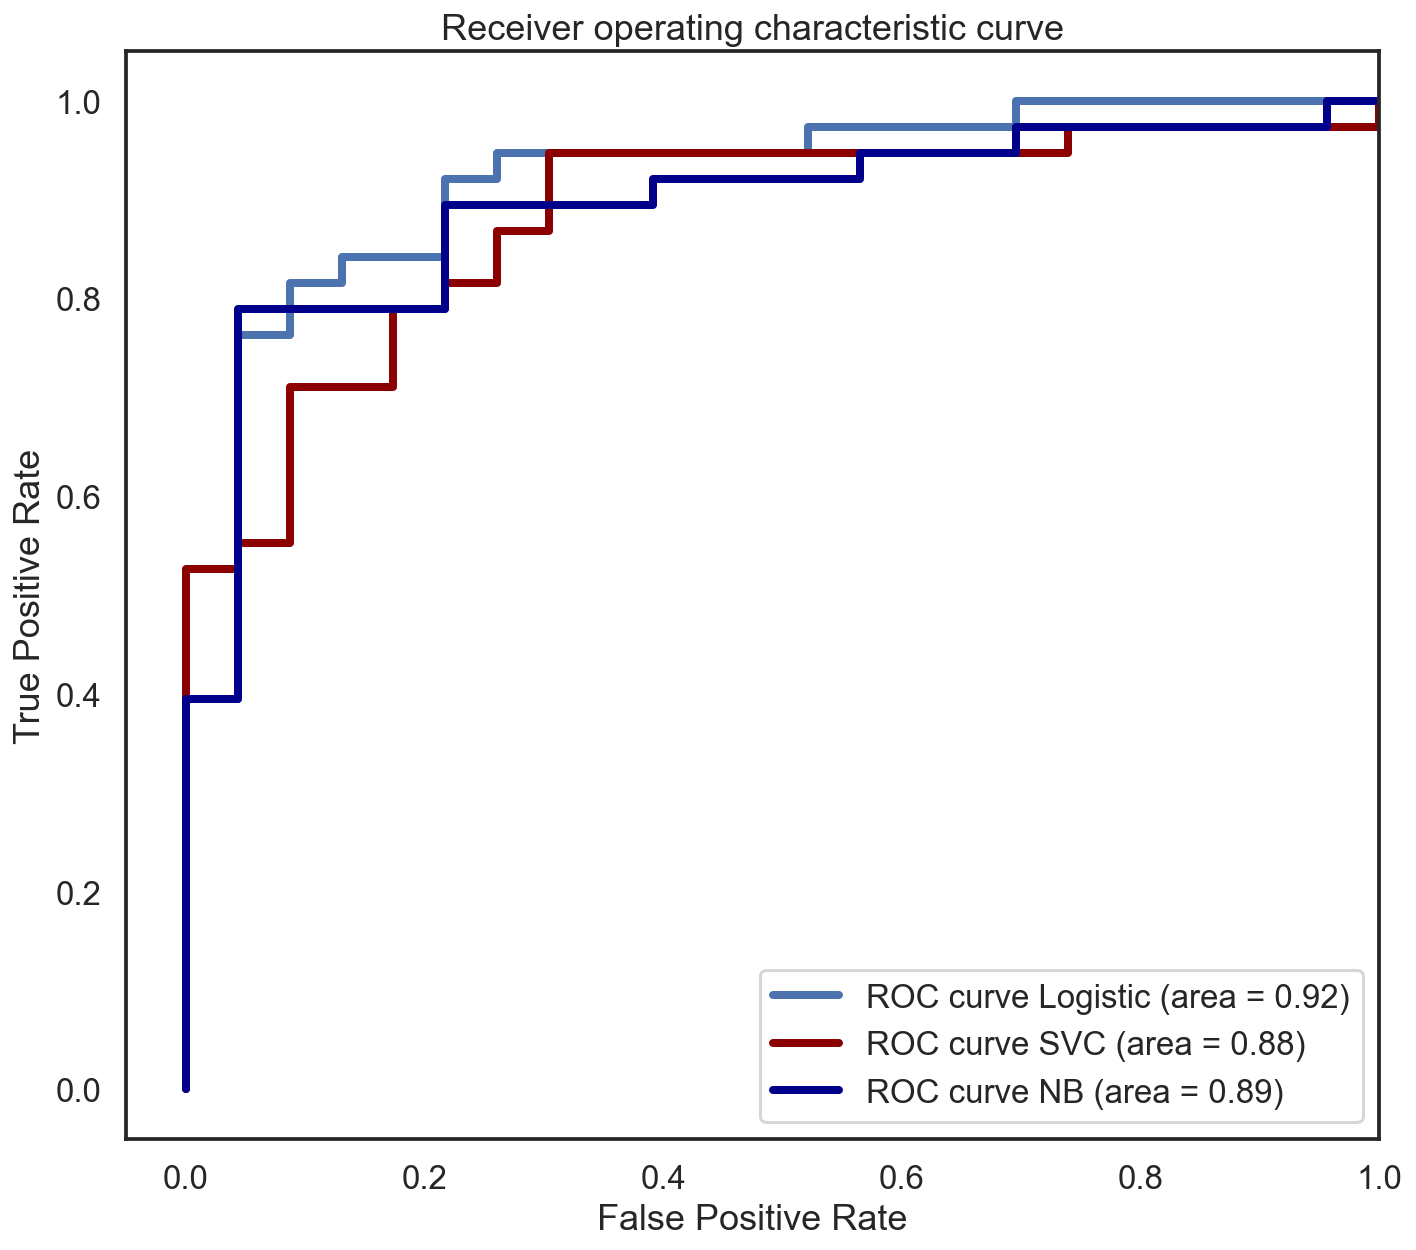

In [58]:
# plot AUC for models
yhat_pp_lin = lr_gs.predict_proba(scaled_X_test)
yhat_pp = svc_gs.predict_proba(X_test)
yhat_pp_nb = nb.predict_proba(scaled_X_test)
fpr, tpr, _ = roc_curve(y_test, yhat_pp_lin[:,1])
fpr_svc, tpr_svc, _ = roc_curve(y_test, yhat_pp[:,1])
fpr_nb, tpr_nb, _ = roc_curve(y_test, yhat_pp_nb[:,1])

plt.figure(figsize=[10,10])

plt.plot(fpr, tpr, label='ROC curve Logistic (area = %0.2f)' % auc(fpr, tpr), linewidth=4)
plt.plot(fpr_svc, tpr_svc, label='ROC curve SVC (area = %0.2f)' % auc(fpr_svc, tpr_svc), linewidth=4, color='darkred')
plt.plot(fpr_nb, tpr_nb, label='ROC curve NB (area = %0.2f)' % auc(fpr_nb, tpr_nb), linewidth=4, color='darkblue')
plt.xlim([-0.05, 1.0])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate', fontsize=18)
plt.ylabel('True Positive Rate', fontsize=18)
plt.title('Receiver operating characteristic curve', fontsize=18)
plt.legend(loc="lower right")
#plt.savefig('roc_curve.png')
